# OUTREACH ANALYSIS PROJECT 
EXCELERATE INTERSHIP

In [6]:
# Import python Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import re

## LOAD DATASET

In [8]:
# Load Dataset
'''
ApplicantData = apd
CampaignData = cpd
OutreachData = opd
'''
apd = pd.read_excel(r"C:\Users\DELL\Documents\Excel\ApplicantData.xlsx")
cpd = pd.read_excel(r"C:\Users\DELL\Documents\Excel\CampaignData.xlsx")
opd = pd.read_excel(r"C:\Users\DELL\Documents\Excel\OutreachData.xlsx")

In [9]:
'''
REASON: Check the rows of each dataset
RESULT: First 3 rows of each dataset
'''
# ApplicantData
apd.head(3)

,App_ID,Country,University,Phone_Number
0,12345,India,Illinois Institute of Technology,9823241234
1,12345,India,Illinois Institute of Technology,8805617501
2,12345,India,Illinois Institute of Technology,18019011222


In [10]:
# OutreachData
opd.head(3)

,Reference_ID,Received_At,University,Caller_Name,Outcome_1,Remark,Campaign_ID,Escalation_Required
0,12345,04-28-2023 12:15:19,Illinois Institute of Technology,Shailja,Connected,NaN,IANF23,No
1,12345,04-28-2023 13:04:05,Illinois Institute of Technology,Shailja,Reschedule,NaN,IANF23,No
2,12345,2023-01-05 11:14:11,Illinois Institute of Technology,Shailja,Connected,NaN,IANF23,No


In [11]:
# CampaignData
cpd.head(3)

,ID,Name,Category,Intake,University,Status,Start_Date
0,AANF23,"GR GS FA24 Campaign- Admit, No Deposit",Post Admission,AY2024,Illinois Institute of Technology,Completed,3/20/2024 0:00
1,AND23,GR GS FA24 Campaign- Deposit No Action,Post Admission,AY2024,Illinois Institute of Technology,Completed,2024-11-09 00:00:00
2,BPNANF23,"GR GS FA24 Campaign- Deposit, No I-20",Post Admission,AY2024,Illinois Institute of Technology,Completed,2024-11-07 00:00:00


In [12]:
'''
REASON: Left Join OutreachData(opd) on ApplicantData(apd),
        the join the merge_1(Outreach and Applicant Data)
        
RESULT: df_2 dataset consisting of all 3 dataset
'''
# Merge opd and apd
df_1 = pd.merge(
    opd, 
    apd, 
    left_on = 'Reference_ID',
    right_on = 'App_ID', 
    how = 'left'
    )
# Merge df_1 and cpd
df_2 = pd.merge(
    df_1, 
    cpd, 
    left_on = 'Campaign_ID',
    right_on = 'ID', 
    how = 'left'
    )
#check
print(f"Dataset Size: {df_2.shape[0]} rows, {df_2.shape[1]} columns")

Dataset Size: 7661567 rows, 19 columns


## DATA CLEANING

In [13]:
# Remove Duplicates
'''
REASON: df_2 currently bloated at 7M+ rows due to duplicates
        we remove duplicates using the following columns: Reference_ID,
        Received_At, Campaign_ID 
RESULT: Duplicates removed, total valid rows = 37880
'''
df_2 = df_2.drop_duplicates(subset= ['Reference_ID',
                                     'Received_At',
                                     'Campaign_ID'])
#check
print(f'Dataset Size: {df_2.shape[0]} rows, {df_2.shape[1]} columns')

Dataset Size: 37880 rows, 19 columns


In [14]:
'''
REASON: Create a new DataFrame to work with only the columns most relevnant
        to this analysis
RESULT: A new dataset consisiting of;
        Reference_ID, Campaign_ID,
        Country, Phone_Number,
        Outcome_1, Received_At
'''
#Select columns to work with in new dataframe
df_3 = df_2.copy()[['Reference_ID', 'Campaign_ID','Country', 'Phone_Number','Outcome_1', 'Received_At']]

#check
print(f'Dataset Size: {df_3.shape[0]} rows, {df_3.shape[1]} columns')

Dataset Size: 37880 rows, 6 columns


In [15]:
'''
REASON: To verify the sum of null values in each columns
RESULT: Country and Phone_Number column have 104 null values each 
'''
#Check sum of null values 
print(f'TOTAL SUM OF NULL VALUES','\n', df_3.isnull().sum())

TOTAL SUM OF NULL VALUES 
 Reference_ID      0
Campaign_ID       0
Country         104
Phone_Number    104
Outcome_1         0
Received_At       0
dtype: int64


In [16]:
'''
REASON: To stanadrdise inconsistencies in the Country column,
        fix all email and other free text,
        Normalize Phone_Number to column
                        
RESULT: Standardised all items in the country columns
        Phone_Number standardized as whole numbers 
'''
# Capitalize the Country Column
df_3['Country'] = df_3['Country'].str.title()

#Remove non-country values
invalid = r'@|\d|[_\-\/\\]\.|,'
email_mask = df_3['Country'].str.contains(invalid, na= False, regex= True)
df_3.loc[email_mask, 'Country'] = np.nan

#Normilize Phone_Number Column
df_3['Phone_Number'] = df_3['Phone_Number'].astype(str).str.strip().replace({'nan': np.nan, 'None': np.nan,
                                                                             '': np.nan})

#Check
print('COUNTRY:','\n', df_3['Country'].unique())

COUNTRY: 
 ['India' 'Nigeria' nan 'Na' 'Naq' '-' 'Taiwan' 'Pakistan' 'Bangladesh'
 'South Africa' 'China' 'Afghanistan' 'Azerbaijan' 'Algeria' 'Armenia'
 'Bahrain' 'Bolivia' 'Botswana' 'Brazil' 'Cameroon' 'Burundi' 'Djibouti'
 'Egypt' 'Eritrea' 'Estonia' 'Ethiopia' 'Gambia The' 'Ghana' 'Argentina'
 'Belarus' 'Finland' 'Germany' 'Canada' 'Iran' 'Nepal' 'Myanmar' 'Kenya'
 'South Korea' 'Ecuador' 'France' 'Yemen' 'Zambia' 'Zimbabwe' 'Sri Lanka'
 'Rwanda' 'Saudi Arabia'
 'Student Wants To Change The Degree From Doctor Of Philosophy To Masters'
 'Not Able To Provide Official Transcript' 'Indonesia' 'Australia'
 'Lebanon' 'Kuwait' 'Malawi' 'Colombia' "Cote D'Ivoire" 'Angola'
 'C�Te Divoire' 'Cyprus' 'Dominica' 'Czech Republic'
 'United Arab Emirates' 'Uganda' 'Spain' 'Sierra Leone' 'Somalia'
 'Tanzania' 'Gambia' 'Indinesia' 'Italy' 'Israel' 'Jordan' 'Kazakhstan'
 'Mongolia' 'Panama' 'Turkey' 'Uzbekistan' 'Tajikistan' 'Syria' 'Sweden'
 'Norway' 'Swaziland' 'Russian Federation' 'Sudan' 'Latvia

In [17]:
'''
REASON: Country inconsistenies:
                                Inavlid Country Spelling, 
                                match invalid countries with predefined country code 

RESULT: Country Column standardized appropriately
'''
# Define Valids
countries = {'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 
             'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
             'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 
             'Cabo Verde',  'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
             'Costa Rica', 'Cote d\'Ivoire', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Cayman Islands',
             'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
             'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
             'Fiji', 'Finland', 'France',
             'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
             'Haiti', 'Honduras', 'Hungary',
             'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
             'Jamaica', 'Japan', 'Jordan',
             'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
             'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
             'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia',
             'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
             'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Norway',
             'Oman',
             'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
             'Qatar',
             'Romania', 'Russia', 'Rwanda',
             'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia',
             'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
             'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria',
             'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
             'Tuvalu',
             'Uganda',
             'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Uzbekistan',
             'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 
             'Yemen', 
             'Zambia', 'Zimbabwe'
}

phone_to_country = { '93': 'Afghanistan', '355': 'Albania', '213': 'Algeria', '376': 'Andorra', '244': 'Angola', '1268': 'Antigua and Barbuda',
                    '54': 'Argentina', '374': 'Armenia', '61': 'Australia', '43': 'Austria', '994': 'Azerbaijan', 
                    '1242': 'Bahamas', '973': 'Bahrain', '880': 'Bangladesh', '1246': 'Barbados', '375': 'Belarus', '32': 'Belgium', '501': 'Belize',
                    '229': 'Benin', '975': 'Bhutan', '591': 'Bolivia', '387': 'Bosnia and Herzegovina', '267': 'Botswana', '55': 'Brazil', 
                    '673': 'Brunei', '359': 'Bulgaria', '226': 'Burkina Faso', '257': 'Burundi', 
                    '238': 'Cabo Verde', '855': 'Cambodia', '237': 'Cameroon', '1': 'Canada', '236': 'Central African Republic', '235': 'Chad', 
                    '56': 'Chile', '86': 'China', '57': 'Colombia', '269': 'Comoros', '242': 'Congo', '506': 'Costa Rica', '225': "Cote d'Ivoire",
                    '385': 'Croatia', '53': 'Cuba', '357': 'Cyprus', '420': 'Czech Republic', 
                    '45': 'Denmark', '253': 'Djibouti', '1767': 'Dominica', '1809': 'Dominican Republic', 
                    '593': 'Ecuador', '20': 'Egypt', '503': 'El Salvador', '240': 'Equatorial Guinea', '291': 'Eritrea', '372': 'Estonia',
                    '268': 'Eswatini', '251': 'Ethiopia', 
                    '679': 'Fiji', '358': 'Finland', '33': 'France', 
                    '241': 'Gabon', '220': 'Gambia', '995': 'Georgia', '49': 'Germany', '233': 'Ghana', '30': 'Greece', '1473': 'Grenada', 
                    '502': 'Guatemala', '224': 'Guinea', '245': 'Guinea-Bissau', '592': 'Guyana', 
                    '509': 'Haiti', '504': 'Honduras', '36': 'Hungary', 
                    '354': 'Iceland', '91': 'India', '62': 'Indonesia', '98': 'Iran', '964': 'Iraq', '353': 'Ireland', '972': 'Israel', '39': 'Italy',
                    '1876': 'Jamaica', '81': 'Japan', '962': 'Jordan', 
                    '774': 'Kazakhstan', '254': 'Kenya', '686': 'Kiribati', '965': 'Kuwait', '996': 'Kyrgyzstan',
                    '856': 'Laos', '371': 'Latvia', '961': 'Lebanon', '266': 'Lesotho', '231': 'Liberia', '218': 'Libya', '423': 'Liechtenstein',
                    '370': 'Lithuania', '352': 'Luxembourg',
                    '261': 'Madagascar', '265': 'Malawi', '60': 'Malaysia', '960': 'Maldives', '223': 'Mali', '356': 'Malta', '692': 'Marshall Islands',
                    '222': 'Mauritania', '230': 'Mauritius', '52': 'Mexico', '691': 'Micronesia', '373': 'Moldova', '377': 'Monaco', '976': 'Mongolia',
                    '382': 'Montenegro', '212': 'Morocco', '258': 'Mozambique', '95': 'Myanmar',
                    '264': 'Namibia', '674': 'Nauru', '977': 'Nepal', '31': 'Netherlands', '64': 'New Zealand', '505': 'Nicaragua', '227': 'Niger', 
                    '234': 'Nigeria', '850': 'North Korea', '389': 'North Macedonia', '47': 'Norway',
                    '968': 'Oman',
                    '92': 'Pakistan', '680': 'Palau', '507': 'Panama', '675': 'Papua New Guinea', '595': 'Paraguay', '51': 'Peru', '63': 'Philippines',
                    '48': 'Poland', '351': 'Portugal',
                    '974': 'Qatar',
                    '40': 'Romania', '7': 'Russia', '250': 'Rwanda', 
                    '1869': 'Saint Kitts and Nevis', '1758': 'Saint Lucia', '1784': 'Saint Vincent and the Grenadines', '685': 'Samoa', 
                    '378': 'San Marino', '239': 'Sao Tome and Principe', '966': 'Saudi Arabia', '221': 'Senegal', '381': 'Serbia', '248': 'Seychelles',
                    '232': 'Sierra Leone', '65': 'Singapore', '421': 'Slovakia', '386': 'Slovenia', '677': 'Solomon Islands', '252': 'Somalia',
                    '27': 'South Africa', '211': 'South Sudan', '34': 'Spain', '94': 'Sri Lanka', '249': 'Sudan', '597': 'Suriname', '46': 'Sweden',
                    '41': 'Switzerland', '963': 'Syria', 
                    '886': 'Taiwan', '992': 'Tajikistan', '255': 'Tanzania', '66': 'Thailand', '670': 'Timor-Leste', '228': 'Togo', '676': 'Tonga', 
                    '1868': 'Trinidad and Tobago', '216': 'Tunisia', '90': 'Turkey', '993': 'Turkmenistan', '688': 'Tuvalu', 
                    '256': 'Uganda', '380': 'Ukraine', '971': 'United Arab Emirates', '44': 'United Kingdom', '598': 'Uruguay', '998': 'Uzbekistan',
                    '678': 'Vanuatu', '379': 'Vatican City', '58': 'Venezuela', '84': 'Vietnam', 
                    '967': 'Yemen',
                    '260': 'Zambia', '263': 'Zimbabwe'
}

phone_to_country = phone_to_country
countries = set(phone_to_country.values())

# Define Country from phone functions
def country_from_phone(country, phone_number):
    """
    Keep country if found in countries,
    Else derive from phone number using first 3 digits.
    Return NaN if no match.
    """
    # Keep valid existing country
    if isinstance(country, str):
        country_clean = country.strip()

        if (
            country_clean in countries and
            re.fullmatch(r"[A-Za-z ]+", country_clean)
        ):
            return country_clean

    # Derive from phone number
    if phone_number is None or str(phone_number).strip() == "":
        return np.nan

    phone = str(phone_number).strip().replace("+", "").replace(" ", "")

    if not phone.isdigit():
        return np.nan

    if phone.startswith('1'):
        prefix = phone[:4]
        return phone_to_country.get(prefix, 'Canada')
    else:
        prefix = phone[:3]
        return phone_to_country.get(prefix, np.nan)

# Apply
df_3['Country'] = df_3.apply(
    lambda row: country_from_phone(
        row['Country'],
        row['Phone_Number']
    ),
    axis=1
)
# Check
print('COUNTRY:','\n',df_3['Country'].unique())

COUNTRY: 
 ['India' 'Nigeria' nan 'Qatar' 'Canada' 'Taiwan' 'Pakistan' 'Nepal'
 'Bangladesh' 'Zambia' 'Sudan' 'Tanzania' 'Somalia' 'Saudi Arabia' 'Kenya'
 'Liberia' 'Kuwait' 'Jordan' 'Ghana' 'Ethiopia' 'Kazakhstan' 'Morocco'
 'South Africa' 'China' 'Panama' 'Uzbekistan' 'Uganda' 'Cameroon'
 'Azerbaijan' 'Rwanda' 'United Arab Emirates' 'Andorra' 'Saint Lucia'
 'Dominica' 'Saint Vincent and the Grenadines' 'Afghanistan' 'Algeria'
 'Armenia' 'Bahrain' 'Bolivia' 'Botswana' 'Brazil' 'Burundi' 'Djibouti'
 'Namibia' 'Egypt' 'Eritrea' 'Estonia' 'Gambia' 'Montenegro' 'Argentina'
 'Belarus' 'Finland' 'Germany' 'Sierra Leone' 'Iran' 'Myanmar' 'Ecuador'
 'France' 'Yemen' 'Zimbabwe' 'Sri Lanka' 'Indonesia' 'Australia' 'Lebanon'
 'Malawi' 'Colombia' "Cote d'Ivoire" 'Angola' 'Cyprus' 'Czech Republic'
 'Spain' 'Italy' 'Israel' 'Mongolia' 'Turkey' 'Tajikistan' 'Syria'
 'Sweden' 'Norway' 'Eswatini' 'Latvia' 'Georgia' 'Mozambique' 'Malaysia'
 'Vietnam' 'Honduras' 'Iceland' 'Guyana' 'Japan' 'South Sudan'


In [18]:
'''
REASON: Reference_ID inconsistenies:
                                Inavlid Reference_ID with NaN,
                                pad less than 6 figures with 0
RESULT: Reference_ID Column standardized appropriately
'''
# Convert Reference_ID column to string
df_3['Reference_ID'] = df_3['Reference_ID'].astype(str)

# Define invalid values
invalid = [
    'wrong number', '.......', '``````', ' 00000-',
    'Graduate', '.....', ',,,,,', '/////////', '////////'
]

# Normalize Case & strip
df_3['Reference_ID'] = df_3['Reference_ID'].str.strip().str.lower()

# Replace 'invalid' values with NaN
df_3['Reference_ID'] = df_3['Reference_ID'].replace(invalid, np.nan)

# Remove non-numeric characters
df_3['Reference_ID'] = df_3['Reference_ID'].str.replace(r'[^0-9]', '', regex=True)

# Replace empty strings with NaN
df_3['Reference_ID'] = df_3['Reference_ID'].replace('', np.nan)

# Pad only valid numeric values
df_3.loc[df_3['Reference_ID'].notna(), 'Reference_ID'] = (
    df_3.loc[df_3['Reference_ID'].notna(), 'Reference_ID']
    .str.zfill(6)
)

#Check
print('Reference_ID:','\n',df_3['Reference_ID'].unique())

Reference_ID: 
 ['012345' '347397' '358065' ... '98077675' '9876789' '425358']


## COLUMN CREATION

In [19]:
'''
REASON: In Outcome_1, Define:
                             'Not connected',
                             'Wrong number',
                             'Disconnected',
                             'Voicemail'    AS: 
                                               NOT CONNECTED
                                            ELSE:
                                                CONNECTED
RESULT: Created Outcome_2 as Connected or Not Connected 
'''
# Define not_connected
not_connected = [
    'Not connected',
    'Wrong number',
    'Disconnected',
    'Voicemail'
]

# Created Outcome_2
df_3['Outcome_2'] = df_3['Outcome_1'].isin(not_connected)
df_3['Outcome_2'] = df_3['Outcome_2'].map({
    True: 'Not Connected',
    False: 'Connected'
})

#Check
print(f'OUTCOME_2:','\n',df_3['Outcome_2'].unique())

OUTCOME_2: 
 ['Connected' 'Not Connected']


In [20]:
'''
REASON: To create a Month_Received_At column when each outreach was made from Received_At  
RESULT:  Month_Received_At column when each outreach was made
'''
# fromat Received_At to Datetime 
df_3['Received_At'] = pd.to_datetime(df_3['Received_At'])

# Month
df_3['Month_Received_At'] = df_3['Received_At'].dt.strftime('%b')

#Check
print(f'Months:',df_3['Month_Received_At'].unique())

Months: ['Apr' 'Jan' 'Feb' 'Mar' 'May' 'Nov' 'Dec' 'Jul' 'Jun' 'Aug' 'Sep' 'Oct']


In [21]:
'''
REASON: To count the total Outreach Volume by Months
RESULT: Total Volume of Outreach made each Month
'''
#Group by Month_Received_At and count unique Reference_IDs
monthly_counts = df_3.groupby('Month_Received_At')['Reference_ID'].nunique().reset_index()
monthly_counts.columns = ['Month', 'Outreach Volume']

# sort months in choronological order (not alphabet)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',  'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# convert month to categorical with proper order 
monthly_counts['Month'] = pd.Categorical(monthly_counts['Month'],
                                       categories= month_order,
                                       ordered = True)

# sort by month order
monthly_counts = monthly_counts.sort_values('Month')

#Check
monthly_counts

,Month,Outreach Volume
4,Jan,777
3,Feb,1038
7,Mar,3538
0,Apr,1816
8,May,2459
6,Jun,3962
5,Jul,3471
1,Aug,1146
11,Sep,1214
10,Oct,1715


## DATA VISUALIZATION

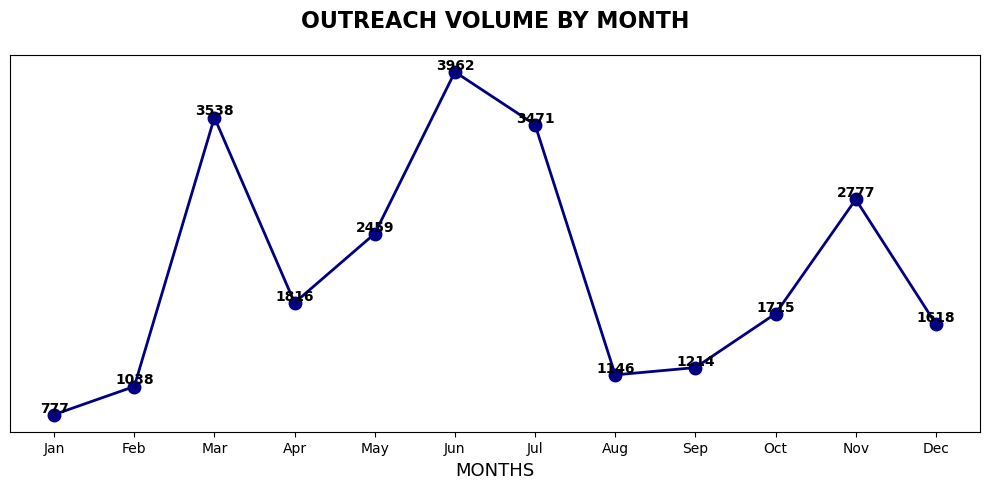

In [23]:
'''
REASON: To plot a chart TO visualize Volume of Outreach over time 
RESULT: Graphical Representation of Outreach Volume by Months with line graph
'''
# Plot a line chart of Outreach over time
plt.figure(figsize = (10, 5))      
plt.plot(monthly_counts['Month'], monthly_counts['Outreach Volume'], 
        marker = 'o', linewidth = 2, markersize = 8, color= 'Navy',
        markeredgewidth= 2)
plt.title('OUTREACH VOLUME BY MONTH', fontsize = 16, fontweight= 'bold', pad= 20)
plt.xlabel('MONTHS', fontsize= 13)
plt.yticks([])

# Value label
for x, y in zip(monthly_counts['Month'], monthly_counts['Outreach Volume']):
    plt.text(x,y + 0.5, str(y), ha = 'center', va= 'bottom', fontsize= 10, fontweight= 'bold')

plt.savefig('Outreach volume by month.png')
plt.tight_layout()
plt.show()

In [17]:
'''
REASON: To calculate the total number of Connected Outreach and,
        total number of Not Connected.
RESULT: Connected counts = 8957
        Not Connected counts = 28923
'''
# Counted counts
connected_counts = (
    df_3['Outcome_2']
    .value_counts()
    .reindex(['Connected', 'Not Connected'], fill_value=0)
)

#Check
connected_counts

Outcome_2
Connected         8957
Not Connected    28923
Name: count, dtype: int64

In [24]:
'''
REASON: Create a Pie Chart to reprensent the ratio of Connected Outreach rate
RESULT: Pictorial Representation of Connected rate with Pie Chart
'''
# Pie Chart
plt.figure(figsize=(4, 5))

# Slice out 'Connected'
explode = (0.1, 0)

plt.pie(
    connected_counts.values,
    explode = explode,
    autopct = '%1.0f%%',
    startangle = 90,
    colors=['#FF6700', 'navy']
)

plt.title(
    'CONNECTION DISTRIBUTION',
    fontsize=14,
    fontweight='bold'
)

plt.legend(
    connected_counts.index,
    loc = 'lower right'
)

plt.axis('equal')
plt.tight_layout()
plt.show()

NameError: name 'connected_counts' is not defined

<Figure size 400x500 with 0 Axes>

In [25]:
'''
REASON: Using duplicate counts of each Reference_ID, 
        calculate the number of attempts made to each unique Reference_ID 
RESULT: Total number of Outreach With:
                                        First attempts,
                                        Second attempts,
                                        Third attempts,
                                        Fourth attempts,
                                        >= fifth attempts.
'''
# Reference_ID counts
ref_counts = (
    df_3['Reference_ID']
    .astype(str)
    .replace('', pd.NA)
    .dropna()
    .value_counts()
)

# Number of attempts per Reference_ID
attempt_1 = (ref_counts == 1).sum()
attempt_2 = (ref_counts == 2).sum()
attempt_3 = (ref_counts == 3).sum()
attempt_4 = (ref_counts == 4).sum()
attempt_5 = (ref_counts >= 5).sum()

#Check
print(f'ATTEMPT    TOTAL')
print('Attempt 1:', attempt_1, '\n''Attempt 2:', attempt_2, '\n''Attempt 3:', attempt_3, '\n''Attempt 4:', attempt_4, '\n''Attempt 5+:', attempt_5)

ATTEMPT    TOTAL
Attempt 1: 8147 
Attempt 2: 3303 
Attempt 3: 1591 
Attempt 4: 1110 
Attempt 5+: 1274


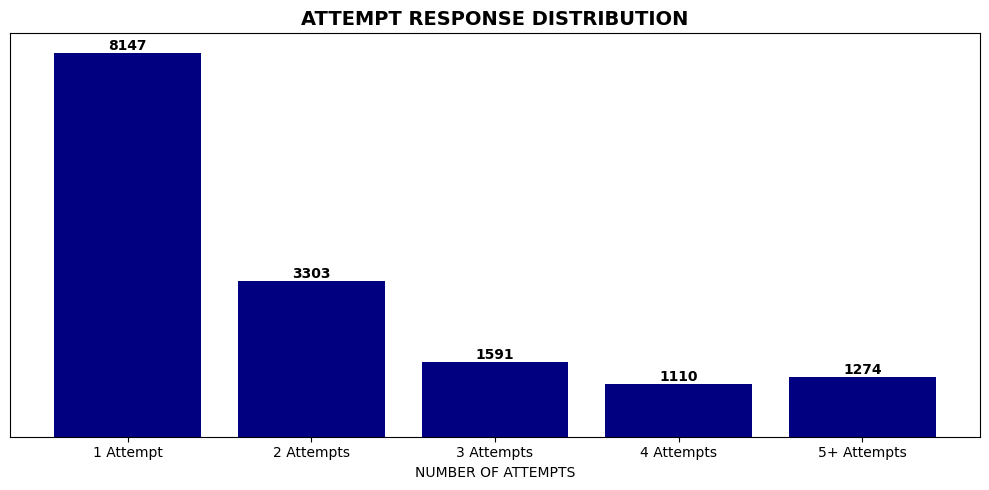

In [27]:
'''
REASON: Create Graph for number of Outreach Attempts
RESULT: Graphical Representation of Outreach Attempts using Bar Chart
'''
# Graph
attempt_labels = ['1 Attempt', '2 Attempts', '3 Attempts', '4 Attempts', '5+ Attempts']
attempt_values = [attempt_1, attempt_2, attempt_3, attempt_4, attempt_5]

plt.figure(figsize = (10, 5))

plt.bar(attempt_labels, attempt_values, color = 'Navy')

plt.title('ATTEMPT RESPONSE DISTRIBUTION', fontsize = 14, fontweight = 'bold')
plt.xlabel('NUMBER OF ATTEMPTS')
plt.yticks([])

# Value labels on bars
for i, value in enumerate(attempt_values):
    plt.text(i, value, str(value), ha = 'center', va = 'bottom', fontweight = 'bold')

plt.savefig('Attempt response distribution.png')
plt.tight_layout()
plt.show()

In [28]:
'''
REASON: Count the total number of unique Campaign_ID,
        and sumof Outreach made by each
RESULT: Top 5 Campaign_ID by Outrach Volume
'''
# Campaign_ID and count unique Reference_IDs 
campaignid_counts = (
    df_3
    .groupby('Campaign_ID')
    .size()
    .reset_index(name='Outreach Volume')
)

# Group by Campaign_ID and count unique Reference_IDs for top 5 
campaignid_counts_top5 = (
    campaignid_counts
    .sort_values(by = 'Outreach Volume', ascending = False)
    .head(5)
)

#Check
campaignid_counts_top5

,Campaign_ID,Outreach Volume
10,FA24IP,9605
11,FA24SIC,5640
21,SP25NIQ,4331
20,SP25IP,3668
12,IANF23,2697


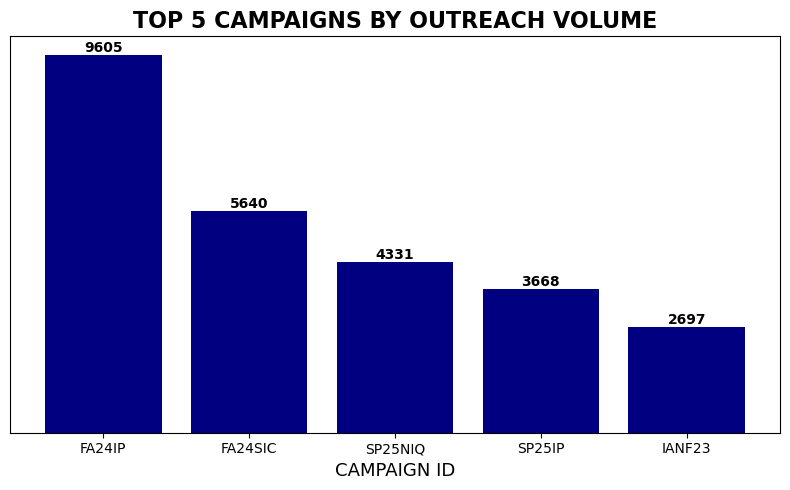

In [29]:
'''
REASON: Create Graph for Campaign_ID and Outreach Volume
RESULT: Graphical Representation of Top 5 Campaign_ID by sum of Outreach Volume using Bar Chart
'''
# Plot top 5 of campaign_ID by count of outreach
plt.figure(figsize = (8, 5))

plt.bar(
    campaignid_counts_top5['Campaign_ID'],
    campaignid_counts_top5['Outreach Volume'],
    color = 'Navy'
)
plt.title('TOP 5 CAMPAIGNS BY OUTREACH VOLUME', fontsize = 16, fontweight = 'bold')
plt.xlabel('CAMPAIGN ID', fontsize=13)
plt.yticks([])

# Value labels
for x, y in zip(campaignid_counts_top5['Campaign_ID'],
                campaignid_counts_top5['Outreach Volume']):
    plt.text(x, y, str(y), ha = 'center', va = 'bottom', fontweight = 'bold')

plt.savefig('Top 5 campaigns.png')
plt.tight_layout()
plt.show()

# DASHBOARD

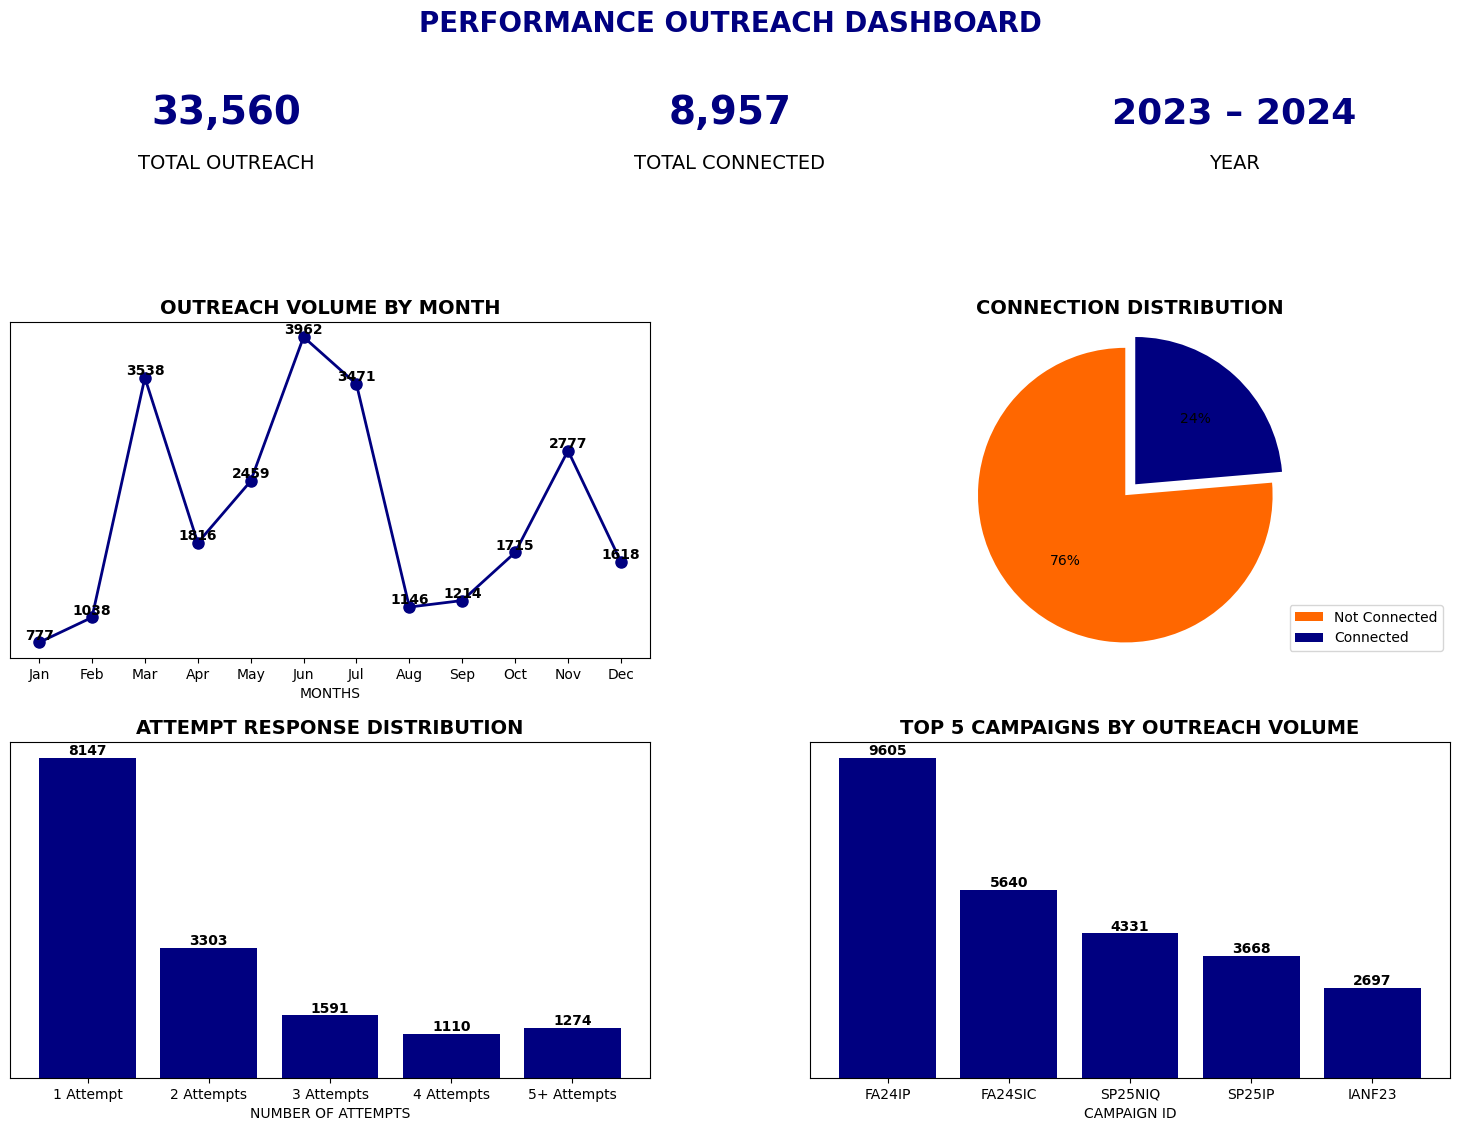


 KEY INSIGHTS AND CONCLUSION:

1. OUTREACH PERFORMANCE OVERVIEW:
   • Total outreach volume indicates sustained engagement activity across the analysis period
   • Outreach trends show clear monthly variation, with identifiable peak and low-contact periods
   • Campaign-driven outreach contributes significantly to overall volume distribution

2. CONNECTION EFFECTIVENESS:
   • A measurable proportion of outreach attempts result in successful connections
   • Repeated contact attempts increase the likelihood of successful engagement
   • Connection outcomes vary by campaign and contact frequency

3. ATTEMPT RESPONSE BEHAVIOR:
   • Majority of responses occur within the first one to three attempts
   • Diminishing returns are observed beyond the third attempt
   • High-attempt cases (4+ attempts) contribute marginally to overall connections

4. CAMPAIGN PERFORMANCE:
   • A small subset of campaigns accounts for a disproportionate share of outreach volume
   • Top-performing campaigns dem

In [30]:
'''
REASON: To merge all our visualized data so far together in a single plane View 
RESULT: Dashboard showing all 4 charts and KPIs
'''
PRIMARY_COLOR = 'navy'

# KPI METRICS
total_outreach = df_3['Reference_ID'].count()
total_connected = df_3['Outcome_2'].eq('Connected').sum()

# DASHBOARD SETUP
fig = plt.figure(figsize=(16, 12))
fig.patch.set_facecolor('white')

fig.suptitle(
    'PERFORMANCE OUTREACH DASHBOARD',
    fontsize=20,
    fontweight='bold',
    color=PRIMARY_COLOR,
    y=0.97
)

# CARD FUNCTION
def card(ax):
    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    box = FancyBboxPatch(
        (0, 0), 1, 1,
        boxstyle="round,pad=0.02,rounding_size=0.04",
        transform=ax.transAxes,
        fc='white',
        ec=PRIMARY_COLOR,
        linewidth=1.5,
        zorder=-1
    )
    ax.add_patch(box)

# KPI: TOTAL OUTREACH
ax1 = fig.add_axes([0.05, 0.80, 0.27, 0.14])
card(ax1)

ax1.text(0.5, 0.6, f"{total_outreach:,}",
         ha='center', va='center',
         fontsize=28, fontweight='bold', color=PRIMARY_COLOR)

ax1.text(0.5, 0.3, "TOTAL OUTREACH",
         ha='center', va='center', fontsize=14)

# KPI: TOTAL CONNECTED
ax2 = fig.add_axes([0.365, 0.80, 0.27, 0.14])
card(ax2)

ax2.text(0.5, 0.6, f"{total_connected:,}",
         ha='center', va='center',
         fontsize=28, fontweight='bold', color=PRIMARY_COLOR)

ax2.text(0.5, 0.3, "TOTAL CONNECTED",
         ha='center', va='center', fontsize=14)

# KPI: YEAR
ax3 = fig.add_axes([0.68, 0.80, 0.27, 0.14])
card(ax3)

ax3.text(0.5, 0.6, "2023 – 2024",
         ha='center', va='center',
         fontsize=26, fontweight='bold', color=PRIMARY_COLOR)

ax3.text(0.5, 0.3, "YEAR",
         ha='center', va='center', fontsize=14)

# LINE CHART: OUTREACH BY MONTH
ax4 = fig.add_axes([0.05, 0.43, 0.4, 0.28])

ax4.plot(
    monthly_counts['Month'],
    monthly_counts['Outreach Volume'],
    marker='o',
    linewidth=2,
    markersize=8,
    color=PRIMARY_COLOR
)

ax4.set_title('OUTREACH VOLUME BY MONTH', fontsize=14, fontweight='bold')
ax4.set_xlabel('MONTHS')
ax4.set_yticks([])

for x, y in zip(monthly_counts['Month'], monthly_counts['Outreach Volume']):
    ax4.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

# PIE CHART: CONNECTION DISTRIBUTION
ax5 = fig.add_axes([0.55, 0.43, 0.4, 0.28])
card(ax5)

connected_counts = df_3['Outcome_2'].value_counts()
explode = (0.1, 0)

wedges, texts, autotexts = ax5.pie(
    connected_counts.values,
    explode=explode,
    autopct='%1.0f%%',
    startangle=90,
    colors=['#FF6700', 'navy']
)

ax5.set_title('CONNECTION DISTRIBUTION', fontsize=14, fontweight='bold')
ax5.legend(wedges, connected_counts.index, loc='lower right')
ax5.axis('equal')

# BAR CHART: ATTEMPT DISTRIBUTION
ax6 = fig.add_axes([0.05, 0.08, 0.4, 0.28])

attempt_labels = ['1 Attempt', '2 Attempts', '3 Attempts', '4 Attempts', '5+ Attempts']
attempt_values = [attempt_1, attempt_2, attempt_3, attempt_4, attempt_5]

bars = ax6.bar(attempt_labels, attempt_values, color=PRIMARY_COLOR)

ax6.set_title('ATTEMPT RESPONSE DISTRIBUTION', fontsize=14, fontweight='bold')
ax6.set_xlabel('NUMBER OF ATTEMPTS')
ax6.set_yticks([])

for bar in bars:
    ax6.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             str(int(bar.get_height())),
             ha='center', va='bottom', fontweight='bold')

# BAR CHART: TOP 5 CAMPAIGNS
ax7 = fig.add_axes([0.55, 0.08, 0.4, 0.28])

bars2 = ax7.bar(
    campaignid_counts_top5['Campaign_ID'],
    campaignid_counts_top5['Outreach Volume'],
    color=PRIMARY_COLOR
)

ax7.set_title('TOP 5 CAMPAIGNS BY OUTREACH VOLUME', fontsize=14, fontweight='bold')
ax7.set_xlabel('CAMPAIGN ID')
ax7.set_yticks([])

for x, y in zip(campaignid_counts_top5['Campaign_ID'],
                campaignid_counts_top5['Outreach Volume']):
    ax7.text(x, y, str(y), ha='center', va='bottom', fontweight='bold')

# SHOW DASHBOARD
plt.savefig('Outreach_Dashboard.png')
plt.show()

# Summary
print("""
 KEY INSIGHTS AND CONCLUSION:

1. OUTREACH PERFORMANCE OVERVIEW:
   • Total outreach volume indicates sustained engagement activity across the analysis period
   • Outreach trends show clear monthly variation, with identifiable peak and low-contact periods
   • Campaign-driven outreach contributes significantly to overall volume distribution

2. CONNECTION EFFECTIVENESS:
   • A measurable proportion of outreach attempts result in successful connections
   • Repeated contact attempts increase the likelihood of successful engagement
   • Connection outcomes vary by campaign and contact frequency

3. ATTEMPT RESPONSE BEHAVIOR:
   • Majority of responses occur within the first one to three attempts
   • Diminishing returns are observed beyond the third attempt
   • High-attempt cases (4+ attempts) contribute marginally to overall connections

4. CAMPAIGN PERFORMANCE:
   • A small subset of campaigns accounts for a disproportionate share of outreach volume
   • Top-performing campaigns demonstrate higher operational intensity and reach
   • Lower-volume campaigns may benefit from optimization or consolidation

CONCLUSIONS:
• Outreach efforts are active but unevenly distributed across time and campaigns
• Connection efficiency improves with structured follow-up strategies
• Data quality improvements (phone-country alignment, reference cleanup) materially strengthen insights

RECOMMENDATIONS:
• Prioritize high-performing campaigns for scaling and replication
• Optimize outreach cadence to focus on early-attempt effectiveness
• Introduce campaign-level connection benchmarks and monitoring
• Continue enforcing data standardization for country and reference identifiers
""")

print("\n ANALYSIS COMPLETED!")
print(f" Dataset Size: {df_3.shape[0]} rows, {df_3.shape[1]} columns")
print(f" Period Covered: 2023 – 2024")
print(f" Total Outreach: {total_outreach:,}")
print(f" Total Connected: {total_connected:,}")
print(f" Campaigns Analyzed: {df_3['Campaign_ID'].nunique()}")
print(f" Countries Analyzed:  {df_3['Country'].nunique()}")